45739.5


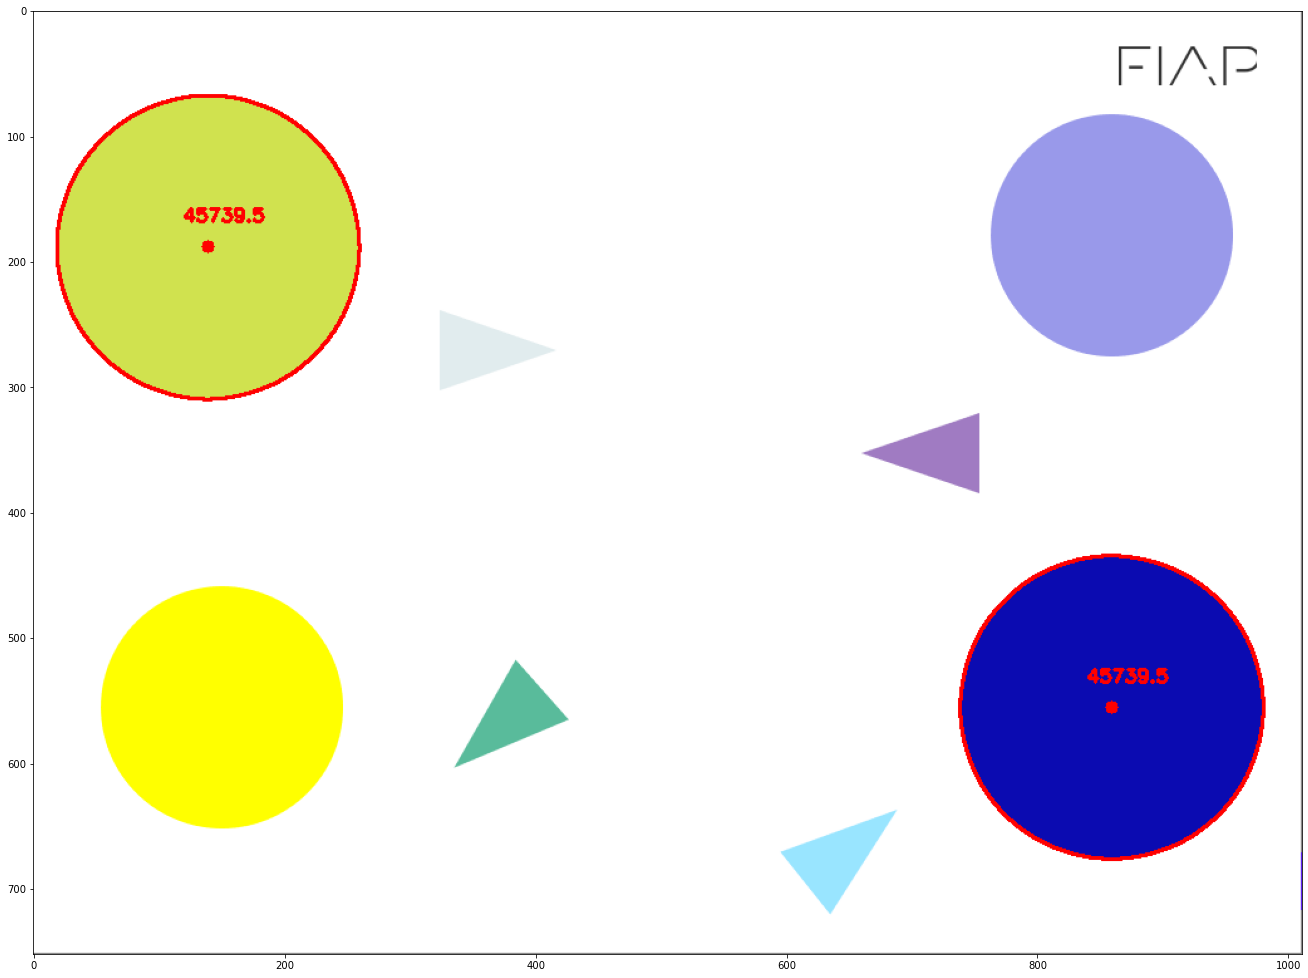

In [34]:
#1 RUBRICA
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import argparse

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask3 = np.array([0, 160, 0])  
mask4 = np.array([255, 255, 230])

mask_hsv = cv2.inRange(img_hsv, mask3, mask4)
blurred = cv2.GaussianBlur(mask_hsv, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

cnt = cnts[0]
area = cv2.contourArea(cnt)
print(area)

for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.drawContours(img, [c], -1, (255, 0, 0), 2)
    cv2.circle(img, (cX, cY), 5, (255, 0, 0), -1)
    cv2.putText(img, str(area), (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

fig = plt.figure(figsize=(50,50))
plt.subplot(1, 2, 1)
plt.imshow(img)
#plt.subplot(1, 2, 2)
#plt.imshow(thresh, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

758510.0
3522.0


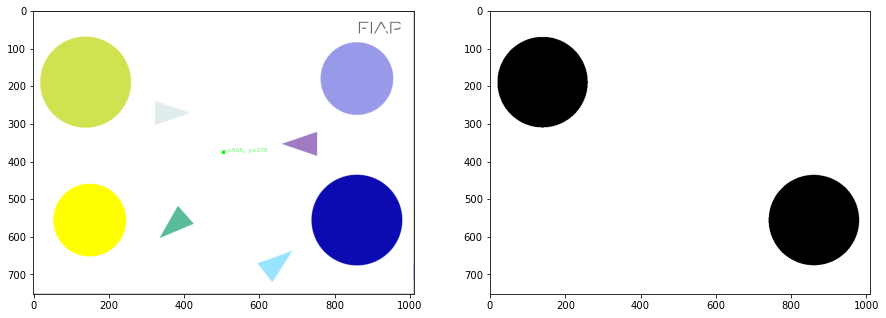

In [15]:
#2 RUBRICA
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask3 = np.array([0, 160, 0])  
mask4 = np.array([255, 255, 230])
mask_hsv = cv2.inRange(img_hsv, mask3, mask4)

ret, th = cv2.threshold(mask_hsv, 200, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnt = contornos[0]
M = cv2.moments(cnt)
cX = int(M["m10"]/M["m00"])
cY = int(M["m01"]/M["m00"])

area = cv2.contourArea(cnt)
print(area)
perimetro = cv2.arcLength(cnt, True)
print(perimetro)
cv2.circle(img, (cX, cY), 5, (0, 255, 0), -1)
cv2.putText(img, "x="+str(cX)+", y="+str(cY), (cX, cY), 1, 1, (0,255,0), 1)

fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(th, cmap="Greys_r", vmin=0, vmax=255)
plt.show()